In [1]:
%run Latex_macros.ipynb

<IPython.core.display.Latex object>

In [2]:
# My standard magic !  You will see this in almost all my notebooks.

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

%matplotlib inline

In [3]:
%run beautify_plots.py


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import neural_net_helper
%aimport neural_net_helper

nnh = neural_net_helper.NN_Helper()

# Residual connections: a gradient highway
[Deep Residual Learning](https://arxiv.org/abs/1512.03385)

There is a clever architectural "trick" to combat the problem of vanishing and exploding gradients.

Consider two layers of a Neural Network
$$
\begin{array}[lll]\\
\y_{(\ll-1)}      & = & a_{(\ll-1)}      & \left( f_{(\ll-1)}( \y_{(\ll-2)}, \W_{(\ll-1)} ) \right) \\
\y_{\llp} & = & a_\llp & \left( f_\llp ( \y_{(\ll-1)}, \W_\llp ) \right) \\
\end{array}
$$

<table>
    <tr>
        <th><center>"Plain" Neural Network</center></th>
    </tr>
    <tr>
        <td><img src="images/Residual_Net_1.png"></td>
    </tr>
</table>

Suppose we make a slight modification
- Allowing $\y_{(\ll-1)}$, the output of layer $(\ll-1)$
- To both flow into layer $\ll$
- And to "skip" over layer $\ll$
- Where it is added, in layer $(\ll+1)$ to the output of layer $\ll$

<table>
    <tr>
        <th><center>Residual Network with Skip Connection</center></th>
    </tr>
    <tr>
        <td><img src="images/Residual_Net_2.png"></td>
    </tr>
</table>

Here are the equations defining the original network:

$$
\begin{array}[lll]\\
\y_{\llp} & = & a_\llp & \left( f_\llp ( \y_{(\ll-1)}, \W_\llp ) \right)  \\
\end{array}
$$
and the modified network:
$$
\begin{array}[lll]\\
\y_{(\ll')} & = & a_\llp \left( f_{(\ll')} ( \y_{(\ll-1)}, \W_{(\ll')} ) \right)    \\
\y_{(\ll +1)} & = & \y_{(\ll')} + \y_{(\ll-1)}
\end{array}
$$

Now suppose we wanted the two networks to compute the same mapping from input $\y_{(\ll-1)} $ to output
$$\y_{(\ll +1)} = \y_\llp$$

Then
$$
\begin{array}[lll]\\
\y_{(\ll +1)} & = & \y_{(\ll')} + \y_{(\ll-1)} & \text{definition of } \y_{(\ll+1)}\\
\y_\llp & = & \y_{(\ll')} + \y_{(\ll-1)} & \text{requiring } \y_{(\ll +1)} = \y_\llp\\
\y_{(\ll')} & = & \y_\llp - \y_{(\ll-1)} & \text{re-arranging terms} \\
\
\end{array}
$$

That is: layer $\ll'$ computes the *residual* of $\y_\llp$ with respect to $\y_{(\ll-1)}$.

This type of architecture is called a *Residual Network* or *Residual Layer*.

The connection of $\y_{(\ll-1)}$ to the input of layer $(\ll+1)$ is called a *Skip connection*

This seems strange (and perhaps pointless) until you consider the Back Propagation process.

Recall how the Loss Gradient
$$\loss'_\llp = \frac{\partial \loss}{\partial \y_\llp}$$

propagates backwards inductively
$$
\begin{array}[lll] \\
\loss'_{(\ll-1)} 
         & = & \loss'_\llp \frac{\partial \y_\llp}{\partial \y_{(\ll-1)}}
\end{array}
$$

It is modulated by Local Gradient $\frac{\partial \y_\llp}{\partial \y_{(\ll-1)}}$
   

In the original Neural Network, the Local Gradient relating the output and input $\y_{(\ll-1)}$ is
$$
\begin{array}[lll]\\
\frac{\partial \y_\llp}{\partial \y_{(\ll-1)}} & = & \frac{\partial a_\llp( f_\llp( \y_{(\ll-1)}, \W_\llp)}{\partial \y_{(\ll-1)} } & \text{since } \y_\llp = a_\llp( f_\llp( \y_{(\ll-1)}, \W_\llp) \\
 & = & a'_\llp   * f'_\llp &
\text{where } a'_\llp = \frac{\partial a_\llp(\ldots)}{\partial f_\llp(\ldots)}; f'_\llp = \frac{\partial f_\llp(\ldots)}{\partial \y_{(\ll-1)}} \\
\end{array}
$$

Whereas, in the modified neural network, the Local Gradient relating the output (now $\y_{(\ll+1)})$ to input $\y_{(\ll-1)}$
$$
\begin{array}[lll]\\
\frac{\partial \y_{(\ll+1)}}{\partial \y_{(\ll-1)}} & = & \frac{\partial \y'_\llp}{\partial \y_{(\ll-1)}} + \frac{\partial \y_{(\ll-1)}}{\partial \y_{(\ll-1)} } & \text{since } \y_{(\ll+1)} = \y'_\llp 
+ \y_{(\ll-1)}\\
& = & \frac{\partial a_{(\ll')} ( f_{(\ll')}(\y_{(\ll-1)}, \W_{(\ll')}) }{\partial \y_{(\ll-1)} } + 1 &  \text{since } y'_\llp 
= a_{(\ll')}( f_{(\ll')}( \y_{(\ll-1)}, \W_{(\ll')}) \\
& = & a'_{(\ll')}  * f'_{(\ll')}  + 1 & \text{where } a'_{(\ll')} = \frac{\partial a_{(\ll')}(\ldots)}{\partial f_{(\ll')}(\ldots)}; f'_{(\ll')} = \frac{\partial f_{(\ll')}(\ldots)}{\partial \y_{(\ll-1)}}
\end{array}
$$

The main difference between the Local Gradients of the two networks
- is the "+1" term

Since the derivative $a'$ of most activation functions is *less than one*
- The Local Gradient of the original network *diminishes* the Loss Gradient
- The Local Gradient of the modified network *does not* diminish the Loss Gradient

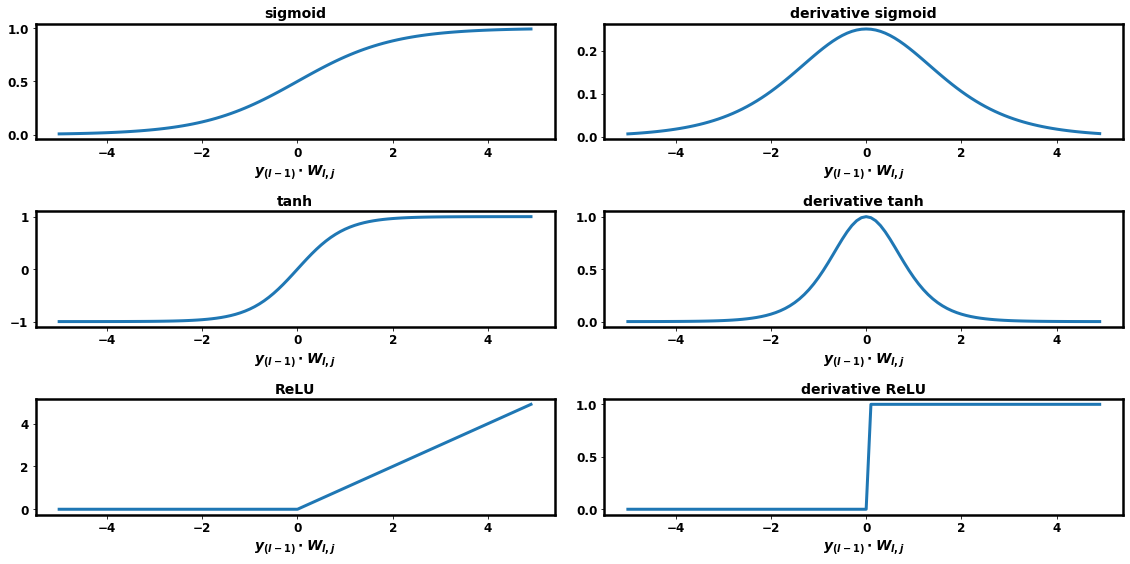

In [5]:
fig, _ = nnh.plot_activations( np.arange(-5,5, 0.1) )

The "+ 1" term in the Local Gradient of the Residual Network allows the Loss Gradient to flow backwards un-diminished
- It is like an "express lane" on the backward pass highway !

This simple trick vanquishes the vanishing gradient !

It is one of the major reasons that we are able to train extremely deep Neural Networks.

Another important fact
- Adding an additional *residual* layer to a Neural Network *cannot* increase the Loss !

Because there exists a set of weights $\W'_{(\ll')}$ for which 
$$
a_{(\ll')} \left( f_{(\ll')} ( \y_{(\ll-1)}, \W'_{(\ll')} ) \right) = 0
$$

The residual layer would choose these weights rather than suffering an increased loss !

By choosing these weight $\W'_{(\ll')}$ the residual layer computes the identity functon
$$
\y_{(\ll+1)} = \y_{(\ll-1)}
$$

Thus, adding more residual layers cannot hurt performance.

Without the skip connection, it has been observed empirically
- That it is difficult for a Neural Network to learn the identity function
- So the skip connection is quite useful

## Technical aside 
There is an unresolved debate where to place the "head" of the skip connection
- insider the activation function
- outside the activation function

We choose the latter to simplify the derivative expression for the loss gradient.

# Conclusion and Preview: Skip connections in LSTM's, GRU's

The gradient highway also turns out to be useful in RNN's.

There are more powerful variants of the RNN called LSTM and GRU which avoid vanishing gradients, partially 
through the use of skip connections.

These variants enhance the power of skip connections by allowing selective skipping via the use
of "gates".

We will see this shortly.

In [6]:
print("Done")

Done
